# [Selected Problems in Machine Learning (NPFL097)](https://ufal.mff.cuni.cz/courses/npfl097)

In [53]:
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import random
from glob import glob
from tqdm import tqdm, tqdm_notebook
import math

In [182]:
with open("data/eng-input.txt", "r") as f:
    data = f.read().replace("\n", "")
    
    
data = data[:5000]
N = len(data)

In [183]:
s = np.random.randint(0, 2, size=N-2)

In [184]:
def cut_words(data, s):
    s_idx = np.where(s)[0] + 1

    idx_start = np.hstack([np.array([0]), s_idx])
    idx_end = np.hstack([s_idx, np.array([N])])
            
    words = [data[start:end] for start, end in zip(idx_start, idx_end)]
    
    return words

In [185]:
" ".join(cut_words(data, s))[:1000]

'o ral t e rnat i ve l yas op po s ing a u t h o r ityintheco n du ct ofh u man r e l at i o ns pr op o n e n tso fa n arc h ism kno wn as a n a r c h i s ts ad v o ca t es t atel e ss soc ietie sa st heonly moral fo rm of s o c i al org a n iz a tio n the rearema n y typ e s an d t r ad i t io ns o f a n archi smn otallofwh ic h ar e mu t u a l ly e x clusive a nar chist sc hoolsofthou gh tcandiff e r fun damenta llys up po r t i ng an y thingfrom ex t r em e i n d i vi d u a l ismtoc o mple t e col lec ti v i s m a nar c hi sm iso ft e n co ns i d er edtobea ra d ica l le ft win g i de o lo gya nd mu c ho fan arch is t e c o n o m i csa ndan a r c his tl eg al p h i los o phy r efl ectan t i stat isti n ter p r et a ti on sof commun ism collectivis m s y ndi c al i s mor p a rt ici p ato r y ec onomi cs h o wev e r anar c h i s mh as a lw a y sinc lud ed a nin d i v idu al is t st ra i n s u p p o r tin ga m ar kete c o nom yandpr i vate p r oper t y ormor al l yun rest rai ned egois

In [186]:
len(set(data))

51

In [187]:
alpha = 1000
p_c = 0.3

s = np.random.randint(0, 2, size=N - 2)

num_iter = 500
words = cut_words(data, s)

count = Counter(words)
word_count = sum(count.values())

C = len(set(data))

def P0(w):
    U = 1.0/float(C)
    
    return U**len(w) * p_c**(len(w)-1)

def PW(w, a=0, b=0):
    return (alpha * P0(w) + count[w] + a) / (alpha + word_count + b)

p_data = []
ss = []

ss0 = 0
ss1 = 0
inner_i = 0

for iter in tqdm_notebook(range(num_iter)):
    for i in tqdm_notebook(np.random.permutation(N - 2), leave=False):
        inner_i += 1
        
        prev_left = 0
        for j in reversed(range(i)):
            if s[j] == 1:
                prev_left = j
                break
                
        next_right = len(s)
        for j in range(i + 1, len(s)):
            if s[j] == 1:
                next_right = j
                break

        prev_word = data[prev_left:i]
        next_word = data[i:next_right]
        joined_word = prev_word + next_word
        
        if s[i] == 0:
            count[joined_word] -= count[joined_word] - 1
            word_count -= 1
        else:
            count[prev_word] -= count[prev_word]
            count[next_word] -= count[next_word]
            word_count -= 2
    
        p0 = PW(joined_word) # (alpha * P0(joined_word) + count[joined_word]) / (alpha + word_count)
        
#         a = (alpha * P0(prev_word) + count[prev_word]) / (alpha + word_count)
#         b = (alpha * P0(next_word) + count[next_word]) / (alpha + word_count + 1)
        p1 = PW(prev_word) * PW(next_word, b=1) # a * b
        
        if (random.random() * (p0 + p1)) < p1:
            ss0 += 1
            s[i] = 0
        else:
            ss1 += 1
            s[i] = 1
                        
        if s[i] == 0:
            count[joined_word] += 1
            word_count += 1
        else:
            count[prev_word] += 1
            count[next_word] += 1
            word_count += 2
           
        if inner_i % 1000 == 0:
            p_data.append(sum([np.log(PW(w)) for w in cut_words(data, s)]))
            ss.append(s.copy())
            


123389 2375611


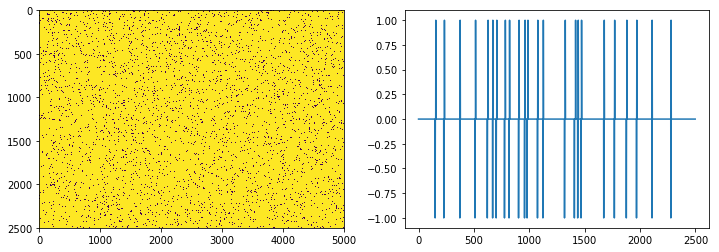

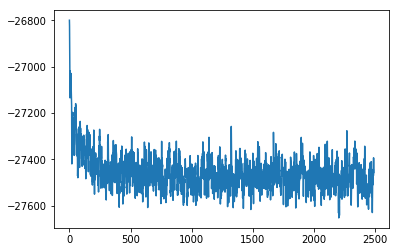

In [188]:
print(ss0, ss1)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.imshow(np.array(ss), aspect="auto")

plt.subplot(122)
plt.plot(np.sum(ss - np.roll(ss, 1), axis=1))

plt.show()

plt.plot(p_data[10:])

In [189]:
" ".join(cut_words(data, s))

'o r a l t e r n a t i v e l y a s o p p o s i n g a u t h o r i t y i n th e c o n d u c t o f h u m a n r e l a t i o ns p r o p o n e n t s o f a n a r c h i s m k n o w n a s a n a r c h i s t s a d v oc a t e s t a t e l e s s s o c i e t i e s a s t h e o n l y m o r a l f o r m o f s o c i a l o r ga n i z a t i o n t h e r e a re m a n y t y pe s a n d t ra di t i o n s o f a n a r c h i s m n o t a l l o f w h i c h a r e m u t u a l ly e x c l u s i v e a n a r c h i s t s ch o o ls o f t h o u g h t c a n d i f f e r f u n da m e n t a l l y s u p p o r t i n g a n y t h i n g f r o m e x t r e m e i n d i v i d u a l i s m t o c o m p le t e c o l l ec t i v i sm a n a r c h i s m i s o f t e n c o n s i d e r e d t o b e a r a d i c a l l ef t w i n g i de o l o g y a n d m u c h o f a na r c h i s t e c o n o m i c s a n d a n a r c h i s t l e g a l p h i l o s o p h y r e f l e c t a n t i s t a t i st i n t e r p r e t at i o n s o f c o m m u n i s m c o l l e c t i v